In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import os
import numpy as np

# mnist数据集下载

In [2]:
mnist_dowmload =False

if not os.path.exists('./mnist/'):
    mnist_dowmload = True
train_data = torchvision.datasets.MNIST(
                                root= './mnist/',
                                train= True,
                                transform=torchvision.transforms.ToTensor(),
                                download=mnist_dowmload)

# 数据加载

In [3]:
train_loader =Data.DataLoader(dataset= train_data, batch_size=20, shuffle=True ) #训练集加载
test_data = torchvision.datasets.MNIST(root= './mnist/',train=False)#测试集
test_x = torch.unsqueeze(test_data.data ,dim=1).type(torch.FloatTensor)[:]/255
test_y = test_data.targets[:]

# cnn网络

In [4]:
class cnn(nn.Module):
    
    def __init__(self):
        super(cnn, self).__init__()
        self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels= 1, out_channels= 16,kernel_size= 5,stride= 1,padding= 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels= 32, kernel_size=5, stride= 1, padding= 2),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
                             )
        self.out = nn.Linear(in_features=32*7*7,out_features=10) 
     
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x
cnn = cnn()
cnn

cnn(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

# 优化器及损失函数

In [5]:
optimizer = torch.optim.Adam(cnn.parameters(),lr=0.01)
loss_fun = nn.CrossEntropyLoss()

# 训练

In [6]:
Epoch = 1

ac=[]
ls=[]
for epoch in range(Epoch):
    for step, (b_x, b_y) in enumerate(train_loader):
    
        output = cnn(b_x)[0]
        loss = loss_fun(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step %50 == 0:
            test_output,last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum())/float(test_y.size(0))
            print('Epoch:', epoch,'| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            
            ac.append(accuracy)
            ls.append(loss.data.numpy())


Epoch: 0 | train loss: 2.3042 | test accuracy: 0.15
Epoch: 0 | train loss: 0.5177 | test accuracy: 0.87
Epoch: 0 | train loss: 0.3722 | test accuracy: 0.93
Epoch: 0 | train loss: 0.1028 | test accuracy: 0.95
Epoch: 0 | train loss: 0.3187 | test accuracy: 0.94
Epoch: 0 | train loss: 0.0276 | test accuracy: 0.94
Epoch: 0 | train loss: 0.1921 | test accuracy: 0.96
Epoch: 0 | train loss: 0.1783 | test accuracy: 0.96
Epoch: 0 | train loss: 0.0508 | test accuracy: 0.96
Epoch: 0 | train loss: 0.0225 | test accuracy: 0.96
Epoch: 0 | train loss: 0.0055 | test accuracy: 0.97
Epoch: 0 | train loss: 0.0602 | test accuracy: 0.95
Epoch: 0 | train loss: 0.2698 | test accuracy: 0.96
Epoch: 0 | train loss: 0.1897 | test accuracy: 0.96
Epoch: 0 | train loss: 0.0017 | test accuracy: 0.93
Epoch: 0 | train loss: 0.0577 | test accuracy: 0.97
Epoch: 0 | train loss: 0.0050 | test accuracy: 0.94
Epoch: 0 | train loss: 0.1461 | test accuracy: 0.96
Epoch: 0 | train loss: 0.0068 | test accuracy: 0.97
Epoch: 0 | t

# 测试

In [7]:
test_output , _= cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')
print('准确率',sum(pred_y==test_y[:10].numpy()/10)*100,'%')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
准确率 100 %


# 画图

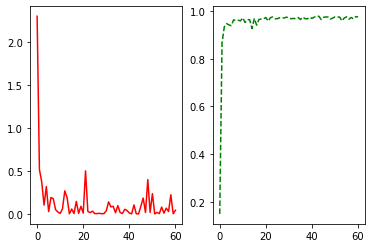

In [8]:
ac.append(accuracy)
ls.append(loss.data.numpy())
plt.subplot(121)#把图像分为1行2列，121代表1行2列中的第一个
plt.plot(ls, 'r-',label='loss' )

plt.subplot(122)#把图像分为1行2列，121代表1行2列中的第二个


plt.plot(ac, 'g--',label='ac' )


plt.show()